# Classifying Images with CNNs

In this exercise you will design a Convolutional Neural Network (CNN) for Fashion Mnist.

CNNs are the workhorses of modern computer vision.

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [6]:
from keras.datasets import fashion_mnist

In [8]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255 #-1 makes the reshape function adaptive
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255

X_train.shape

(60000, 28, 28, 1)

### Exercise 1

Why are we reshaping the data?

What's the new shape?

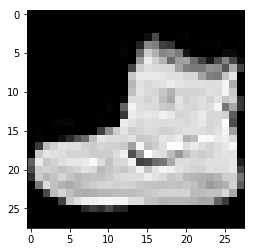

In [9]:
plt.imshow(X_train[0, :, :, 0], cmap='gray')

## Simplest CNN

Let's build a convolutional model! For this, we need to have the data in its original shape. Also note that when we reshape the data below, we add a dimension of 1 - this is the number of **channels** in the image, which is just 1 because these are grayscale images. If they were color, this would be 3 for RGB.

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten

In [11]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 5s 78us/step - loss: 0.4811 - acc: 0.8314


## Exercise 2

- Why are we using the `sparse_categorical_crossentropy` above?

## Exercise 3: A better CNN

Improve the CNN design above. It is up to you what the model will be. Here are some things you need to decide:
* how many convolutional layers?
* what spatial size will your convolutions be?
* how many channels will your convolutions be?
* what nonlinearity will you use?
* will you use pooling? what type?
* how many fully-connected layers will you have?
* will you use dropout or batch normalization or regularization?
* what batch size will you use for training?

Keras provides a special layer called `Flatten` to flatten the convolutional features into a vector before the fully-connected layers. You should look at the documentation for Keras's convolutional layers: http://keras.io/layers/convolutional/. In particular, you may want to look at `Conv2D`, `MaxPooling2D`, `AveragePooling2D`, `Flatten`, and `Dropout`. For this problem, you make want to use the `'rmsprop'` optimizer - it is an algorithm that adapts the learning rate during learning for you automatically.

Can you get to 98% accuracy? You shouldn't need more than a few epochs to do pretty well.

Suggestions:
* Try using at least 2 convolutional layers. This should get you off to a good start and it will come in handy later.

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 3s 54us/step - loss: 0.5000 - acc: 0.8263


In [13]:
score = model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.38730955612659457
Test accuracy: 0.8667


In [16]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 4s 61us/step - loss: 0.4624 - acc: 0.8383


In [17]:
model = Sequential([
    Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 3s 56us/step - loss: 0.4677 - acc: 0.8371


In [18]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(32, (5, 5), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 5s 82us/step - loss: 0.4696 - acc: 0.8333


In [19]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(16, (5, 5), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 4s 73us/step - loss: 0.4893 - acc: 0.8221


In [20]:
model = Sequential([
    Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(32, (5, 5), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 6s 104us/step - loss: 0.4676 - acc: 0.8320


In [21]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (5, 5), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 6s 108us/step - loss: 0.4431 - acc: 0.8402


In [22]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (5, 5), activation='relu'),
    Conv2D(24, (3, 3), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 8s 139us/step - loss: 0.4691 - acc: 0.8321


In [23]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (5, 5), activation='relu'),
    Conv2D(24, (3, 3), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=256, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 7s 122us/step - loss: 0.5778 - acc: 0.7906


In [24]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (5, 5), activation='relu'),
    Conv2D(24, (3, 3), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=1028, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 7s 118us/step - loss: 0.8668 - acc: 0.6850


In [28]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (5, 5), activation='relu'),
    Conv2D(24, (3, 3), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128, epochs=1)
model.summary()

Epoch 1/1
60000/60000 [==============================] - 9s 149us/step - loss: 0.4800 - acc: 0.8254
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 22, 22, 64)        51264     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 20, 20, 24)        13848     
_________________________________________________________________
flatten_17 (Flatten)         (None, 9600)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                96010     
Total params: 161,442
Trainable params: 161,442
Non-trainable params: 0
_________________________________________________________________


In [29]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (5, 5), activation='relu'),
    Conv2D(24, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128, epochs=1)
model.summary()

Epoch 1/1
60000/60000 [==============================] - 9s 142us/step - loss: 0.5154 - acc: 0.8163
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 22, 22, 64)        51264     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 20, 20, 24)        13848     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 24)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 2400)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                24010     
Total params: 89,442
Trainable params: 89,

Epoch 1/1
60000/60000 [==============================] - 9s 155us/step - loss: 0.4736 - acc: 0.8308


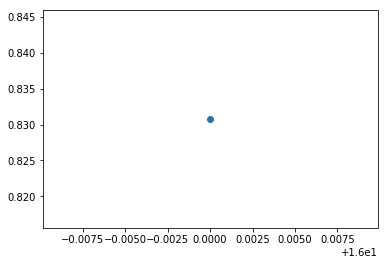

Epoch 1/1
60000/60000 [==============================] - 10s 171us/step - loss: 0.4718 - acc: 0.8303


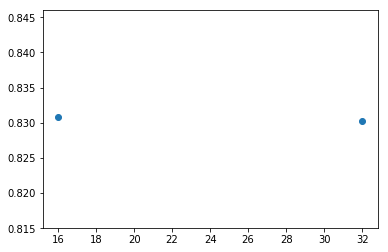

Epoch 1/1
60000/60000 [==============================] - 11s 184us/step - loss: 0.4812 - acc: 0.8260


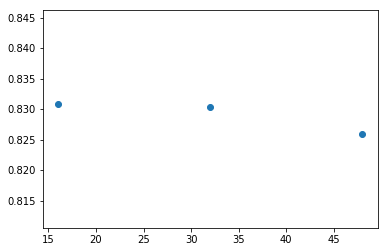

Epoch 1/1
60000/60000 [==============================] - 11s 190us/step - loss: 0.4636 - acc: 0.8345


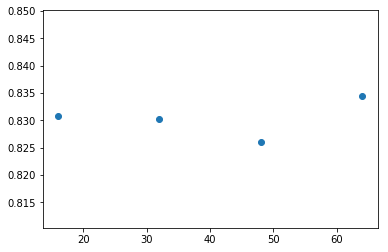

Epoch 1/1
60000/60000 [==============================] - 12s 204us/step - loss: 0.4666 - acc: 0.8295


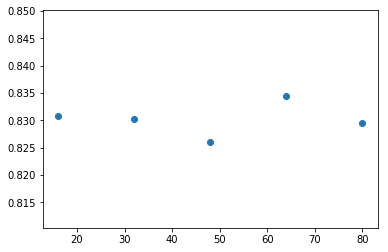

Epoch 1/1
60000/60000 [==============================] - 13s 221us/step - loss: 0.4695 - acc: 0.8319


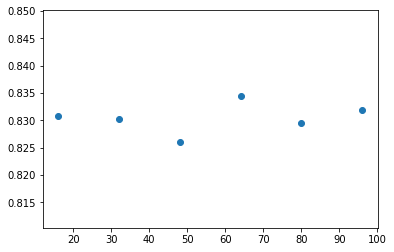

Epoch 1/1
60000/60000 [==============================] - 14s 241us/step - loss: 0.4673 - acc: 0.8320


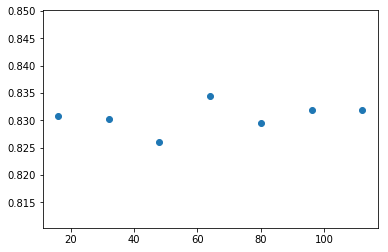

In [60]:
hists = []
nodeRange = []

for i in range(16,128,16):
    
    model = Sequential([
    Conv2D(int(i), (3, 3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(32, (5, 5), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
    ])

    model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=128, epochs=1)
    
    nodeRange.append(int(i))
    hists.append(h.history['acc'])
    plt.scatter(nodeRange, hists)
    plt.pause(0.05)

    

    

Epoch 1/1
60000/60000 [==============================] - 11s 176us/step - loss: 0.4828 - acc: 0.8251


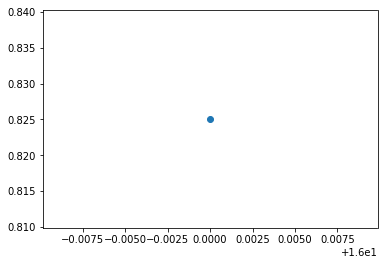

Epoch 1/1
60000/60000 [==============================] - 12s 197us/step - loss: 0.4817 - acc: 0.8268


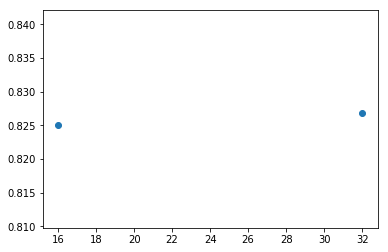

Epoch 1/1
60000/60000 [==============================] - 13s 221us/step - loss: 0.4688 - acc: 0.8323


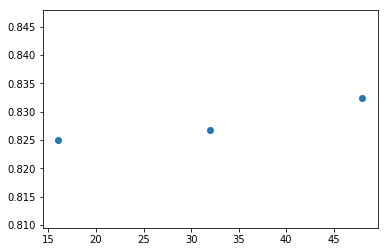

Epoch 1/1
60000/60000 [==============================] - 15s 242us/step - loss: 0.4651 - acc: 0.8324


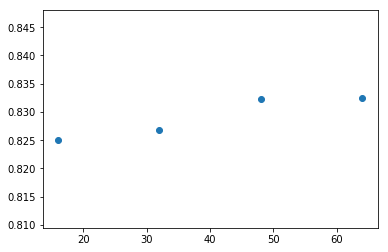

Epoch 1/1
60000/60000 [==============================] - 17s 278us/step - loss: 0.4617 - acc: 0.8346


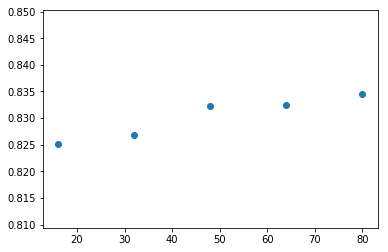

Epoch 1/1
60000/60000 [==============================] - 17s 292us/step - loss: 0.4528 - acc: 0.8359


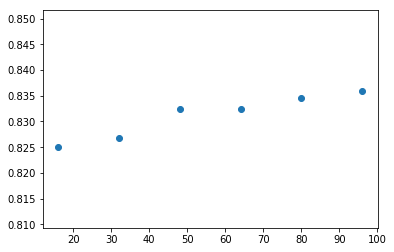

Epoch 1/1
60000/60000 [==============================] - 18s 304us/step - loss: 0.4709 - acc: 0.8285


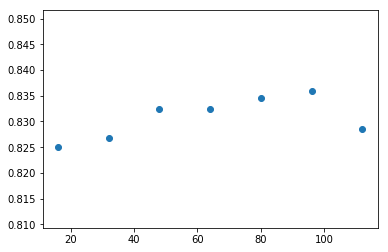

In [61]:
hists = []
nodeRange = []

for i in range(16,128,16):
    
    model = Sequential([
    Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(int(i), (5, 5), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
    ])

    model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=128, epochs=1)
    
    nodeRange.append(int(i))
    hists.append(h.history['acc'])
    plt.scatter(nodeRange, hists)
    plt.pause(0.05)

In [68]:
model = Sequential([
    
    Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'),
    Dropout(0.3),
    Conv2D(48, (5, 5), activation='relu'),
    MaxPooling2D(),
    
    Conv2D(54, (5, 5), activation='relu'),
    Dropout(0.3),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(),
    
    Flatten(),
    Dense(200,activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128, epochs=5)
model.summary()

Epoch 1/5
60000/60000 [==============================] - 14s 226us/step - loss: 0.6560 - acc: 0.7478
Epoch 2/5
60000/60000 [==============================] - 9s 156us/step - loss: 0.3790 - acc: 0.8601
Epoch 3/5
60000/60000 [==============================] - 9s 157us/step - loss: 0.3121 - acc: 0.8864
Epoch 4/5
60000/60000 [==============================] - 9s 158us/step - loss: 0.2813 - acc: 0.8976
Epoch 5/5
60000/60000 [==============================] - 10s 159us/step - loss: 0.2570 - acc: 0.9060
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_247 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_3 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_248 (Conv2D)          (None, 22, 22, 48)        38448     
____________________________________

In [69]:
score = model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2735097621202469
Test accuracy: 0.9019


In [71]:

#this will run the training on the cpu
import tensorflow as tf
with tf.device('cpu:0'):
    model = Sequential([
    
    Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'),
    Dropout(0.3),
    Conv2D(48, (5, 5), activation='relu'),
    MaxPooling2D(),
    
    Conv2D(54, (5, 5), activation='relu'),
    Dropout(0.3),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(),
    
    Flatten(),
    Dense(200,activation='relu'),
    Dense(10, activation='softmax')
    ])

    model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

    model.fit(X_train, y_train, batch_size=128, epochs=5)
    model.summary()

Epoch 1/5
11648/60000 [====>.........................] - ETA: 5:05 - loss: 1.1373 - acc: 0.5652

KeyboardInterrupt: 